# Likelihood Estimation

> In this post, We will review the process of Likelihood Estimation. Through this post, we will optimize Poisson Regression with gradient descent algorithm and Newton-Raphson methods.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Machine_Learning]
- image: images/gradient_descent.png

## Packages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

## Likelihood Function

We can derive the Likelihood function like this,

$$ l(\beta_0, \beta_1) = \frac{1}{n} \big( \sum_{i=1}^n y_i (x_i^T \beta) - exp(x_i^T \beta) - \log(y_i !) \big) \\
\beta = (\beta_0, \beta_1)^T, x_i = (1, x_{i1})^T $$

Usually, Likelihood function is used under some specific distribution (most of normal distribution). In this example, we will use Poisson distribution.

In [3]:
p = 2
n = 1000
true_beta = np.array([[1], [0.5]])

Here, we generate 1000 data samples from normal distribution that has 0 mean and 0.2 std. The reason we add 1 in data sample is that we need to use intercept term for regression.

In [4]:
x = np.random.normal(loc=0, scale=0.2, size=(n, 1))
x = np.hstack((np.ones((n, 1)), x))
x[:5, :]

array([[ 1.        ,  0.32486907],
       [ 1.        , -0.12235128],
       [ 1.        , -0.10563435],
       [ 1.        , -0.21459372],
       [ 1.        ,  0.17308153]])

We build the poisson model with exponential. In this case, exponential function is used as link function.

$$ \lambda(x_i) = \mathbb{E}(Y \vert X = x_i) = \exp(x_i^T \beta) $$

In [6]:
param = np.exp(x @ true_beta)
param[:5, :]

array([[3.19770875],
       [2.55697357],
       [2.57843551],
       [2.44172105],
       [2.96400313]])

In [7]:
y = np.random.poisson(param)
y[:5, :]

array([[4],
       [2],
       [2],
       [3],
       [1]])

## Gradient Descent

So, How can we find true beta from the data samples? Most of use will use a sort of Optimization methods. Here, we will use Gradient Descent.
The mathmatical term can be express like this,

$$ -\nabla l(\beta_0^{(t)}, \beta_1^{(t)}) $$

You can see the negative term of likelihood function. Because we need to find the minimum point of likelihood function. As we add minus in function, optimization process occur the direction of minimization. We borrow the previous poisson function and take the negative gradient of likelihood function.

$$ -\nabla l(\beta_0, \beta_1) = -\frac{1}{n} \sum_{i=1}^n (y_i \cdot x_i - \exp(x_i^T \beta) \cdot x_i) \in R^2 $$

In [8]:
# Initial beta
beta = np.array([.5, 0.5]).reshape((p, 1))

param = np.exp(x @ beta)
grad = -np.mean(y * x - param * x, axis=0).reshape((p, 1))
grad

array([[-1.07590006],
       [-0.03620562]])

Based on these values, we find that $\beta_0$ must be changed the way of opposite direction, which is $(+)$. In order to do that, we need to update the beta. So learning rate $\eta$ is used.

In [17]:
learning_rate = 0.7

# initial beta 
beta = np.zeros((p, 1))
beta_0 = []
beta_1 = []

for i in range(500):
    param = np.exp(x @ beta)
    grad = -np.mean(y * x - param * x, axis=0).reshape((p, 1))
    
    # beta update
    beta_new = beta - learning_rate * grad
    
    if np.sum(np.abs(beta_new - beta)) < 1e-8:
        beta = beta_new
        beta_0.append(beta[0])
        beta_1.append(beta[1])
        print('Iteration {} beta: '.format(i))
        print(beta_new, '\n')
        break
    else:
        beta = beta_new
        beta_0.append(beta[0])
        beta_1.append(beta[1])
        print('Iteration {} beta: '.format(i))
        print(beta_new, '\n')

Iteration 0 beta: 
[[1.2173    ]
 [0.05128819]] 

Iteration 1 beta: 
[[0.76890038]
 [0.08497731]] 

Iteration 2 beta: 
[[1.17481907]
 [0.12502591]] 

Iteration 3 beta: 
[[0.82294632]
 [0.15322112]] 

Iteration 4 beta: 
[[1.14358892]
 [0.18814092]] 

Iteration 5 beta: 
[[0.85957336]
 [0.2118515 ]] 

Iteration 6 beta: 
[[1.11921502]
 [0.24220564]] 

Iteration 7 beta: 
[[0.88634236]
 [0.26222014]] 

Iteration 8 beta: 
[[1.09956325]
 [0.28854142]] 

Iteration 9 beta: 
[[0.90677746]
 [0.30548869]] 

Iteration 10 beta: 
[[1.0834115 ]
 [0.32826791]] 

Iteration 11 beta: 
[[0.92281526]
 [0.34265599]] 

Iteration 12 beta: 
[[1.06997847]
 [0.36233765]] 

Iteration 13 beta: 
[[0.93563883]
 [0.37458085]] 

Iteration 14 beta: 
[[1.05872319]
 [0.39156291]] 

Iteration 15 beta: 
[[0.94602687]
 [0.40200151]] 

Iteration 16 beta: 
[[1.04924815]
 [0.41663734]] 

Iteration 17 beta: 
[[0.95452114]
 [0.42555254]] 

Iteration 18 beta: 
[[1.04124817]
 [0.43815396]] 

Iteration 19 beta: 
[[0.96151472]
 [0.445

After that, we find that the beta is converged to true beta after 213 iterations. Here is value change of each beta.

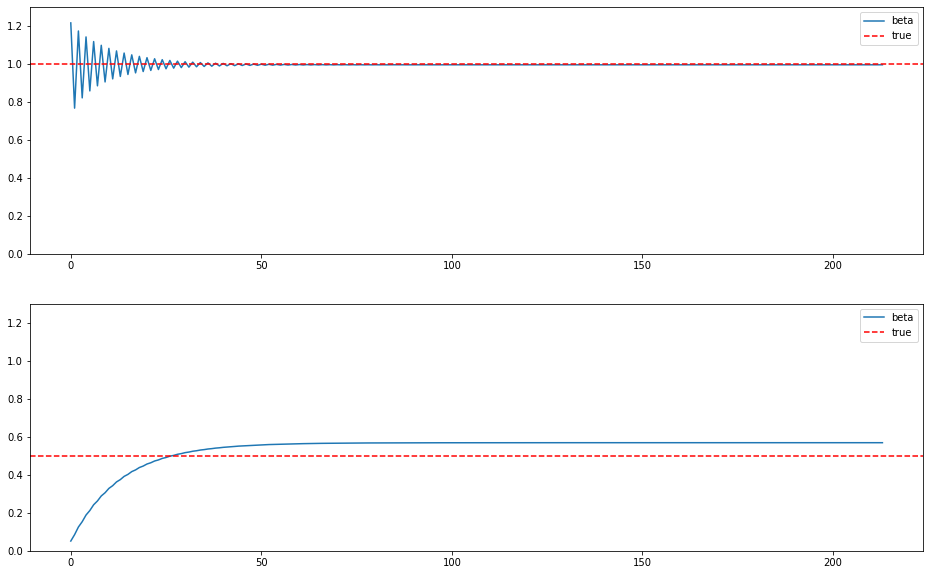

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
ax[0].set_ylim(0, 1.3)
ax[0].plot(beta_0, label='beta')
ax[0].axhline(true_beta[0], color='red', linestyle='--', label='true')
ax[0].legend(loc='best')
ax[1].set_ylim(0, 1.3)
ax[1].plot(beta_1, label='beta')
ax[1].axhline(true_beta[1], color='red', linestyle='--', label='true')
ax[1].legend(loc='best')
plt.show()

In [24]:
grad

array([[ 8.8316704e-09],
       [-5.0488693e-09]])

Of course, we can change the learning rate to get accurate betas.

## Newton-Raphson Method

Unlike Gradient Descent, Newton-Raphson method uses 2nd-order differentiation. So in order to use newton-raphson method, we need to calculate Hessian matrix,

$$ \begin{aligned} H &= - \nabla^2 l (\beta_0^{(t)}, \beta_1^{(t)}) \\ 
&= \frac{1}{n} \sum_{i=1}^n \exp(x_i^T \beta) \cdot x_i x_i^T \end{aligned}$$

In [25]:
beta = np.array([.5, .5]).reshape((p, 1))

param = np.exp(x @ beta)
D = np.diag(np.squeeze(param))
D

array([[1.9395084 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.55088286, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.56390019, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.63728199, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.70810923,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.61818394]])

In [26]:
H = x.T @ D @ x / n
H

array([[1.66309994, 0.04482571],
       [0.04482571, 0.06487878]])

In [27]:
# initial beta 
beta = np.zeros((p, 1))
beta_0 = []
beta_1 = []

for i in range(500):
    param = np.exp(x @ beta)
    grad = -np.mean(y * x - param * x, axis=0).reshape((p, 1))
    D = np.diag(np.squeeze(param))
    H = x.T @ D @ x / n
    
    beta_new = beta - np.linalg.inv(H) @ grad
    
    if np.sum(np.abs(beta_new - beta)) < 1e-8:
        beta = beta_new
        beta_0.append(beta[0])
        beta_1.append(beta[1])
        print('Iteration {} beta: '.format(i))
        print(beta_new, '\n')
        break
    else:
        beta = beta_new
        beta_0.append(beta[0])
        beta_1.append(beta[1])
        print('Iteration {} beta: '.format(i))
        print(beta_new, '\n')

Iteration 0 beta: 
[[1.72694737]
 [1.55267496]] 

Iteration 1 beta: 
[[1.21680451]
 [1.10098661]] 

Iteration 2 beta: 
[[1.02354269]
 [0.68242648]] 

Iteration 3 beta: 
[[0.99755109]
 [0.57208561]] 

Iteration 4 beta: 
[[0.99696661]
 [0.56874834]] 

Iteration 5 beta: 
[[0.99696623]
 [0.5687461 ]] 

Iteration 6 beta: 
[[0.99696623]
 [0.5687461 ]] 



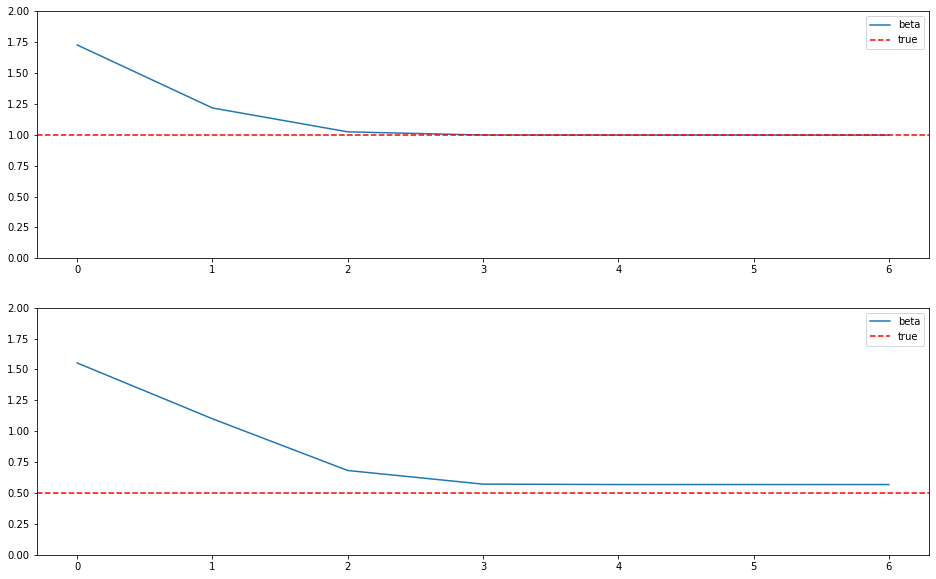

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
ax[0].set_ylim(0, 2)
ax[0].plot(beta_0, label='beta')
ax[0].axhline(true_beta[0], color='red', linestyle='--', label='true')
ax[0].legend(loc='best')
ax[1].set_ylim(0, 2)
ax[1].plot(beta_1, label='beta')
ax[1].axhline(true_beta[1], color='red', linestyle='--', label='true')
ax[1].legend(loc='best')
plt.show()

## Summary

We tried find the minimum of likelihood function with optimization method, like gradient descent and Newton-Raphson Methods. The key point is that differentiation is required for optimization. In this post, we manually calculate the gradient. But actually there are helper functions for calculating gradient (and Hessian matrix) in `Numpy`.